Things to know before -

This is Logistic Regression from scratch. This is done and implemented in a way that this can easily be extended to Neural Networks.

For now, we can assume this to be a single Neuron with one output.

Formulas -

Compact form -

z = w.T X + b -> a = sigmoid(z) -> Loss l(a,y) = - [y * log(a) + (1-y) * log(1-a)]

Our goal - Find optimal w* and b* that minimizes the Loss.

Disclamer- We can write the whole formula in one line,
loss(w,b) =  -[ y * log(sigmoid(w.T X + b)) + (1-y) - log(1-sigmoid(w.T X+ b))]
We can minimize this also, but it gets a bit messy.

We are going to use the compact form to keep everything nice and clean.

Our goal is to get dl/dz. We can achieve that by finding dl/da * da/dz (chain rule).

dl/da= (a-y)/ a(1-a)

da/dz= a * (1-a)

=> dl/dz = a-y

Now, to update w after each iteration, we need to find dl/dw.

dl/dw = dl/dz * dz/dw

dz/dw = X

=> dl/dw= (a-y)*X

similarly update for b- 

dl/db = dl/dz*dz/db

dz/db= 1 

dl/db = a-y

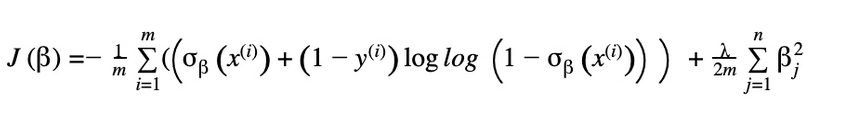

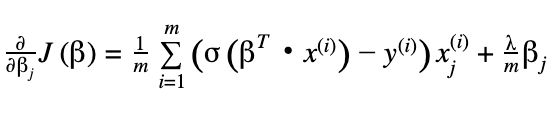

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from sklearn.linear_model import LogisticRegression
from math import sqrt
from numpy.random import rand

In [2]:
def generate_data():
  X,y=make_classification(n_samples=1000,n_features=10,random_state=42) # Generating random data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  lr=0.001
  lamb=0.1
  y_train=y_train.reshape(y_train.shape[0],1)
  y_test=y_test.reshape(y_test.shape[0],1)
  return X_train.T, X_test.T, y_train.T, y_test.T,lr,lamb

In [3]:
def display_data(X_train, X_test, y_train, y_test):
  print('Shape of X_train',X_train.shape)
  print('Shape of X_test',X_test.shape)
  print('Shape of y_train',y_train.shape)
  print('Shape of y_test',y_test.shape)
  print('First three samples from training data with y labels -' ,"\n",X_train[:,:3],"\n",y_train[:,0:3] )

In [4]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [5]:
def forward_prop(w,X):
  return sigmoid( w.T.dot(X)+b )

In [6]:
def back_prop(X,a,y,w,lamb):
  m=X_train.shape[1]
  dw = X.dot((a-y).T) +  ((lamb/m) * w)
  db= (a-y)
  db= np.sum(db,1,keepdims=True)
  return dw,db

In [7]:
def initialize_params(X):
  w=np.random.randn(X.shape[0],1) 
  b=0
  return w,b

In [8]:
def loss(y, y_hat,w):
    loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat)) + (2/y.shape[1]) * np.linalg.norm(w)  
    return loss

In [9]:
def predict(w,X):
  return sigmoid( w.T.dot(X)+b )

In [10]:
if __name__=='__main__':
  iterations=500
  X_train, X_test, y_train, y_test,lr,lamb=generate_data()
  display_data(X_train, X_test, y_train, y_test)
  w,b=initialize_params(X_train)
  lo=[]
  accuracy=[]
  for i in range(0,iterations):
    predictions=[]
    a=forward_prop(w,X_train)
    dw,db=back_prop(X_train,a,y_train,w,lamb)
    w= w- ( lr * dw    ) 
    b=b - (lr *db)
    for i in a.T:
      predictions.append(1 if i>=0.5 else 0)
    lo.append(loss(y_train,a,w))
    accuracy.append(m.accuracy_score(y_train.T,predictions))

Shape of X_train (10, 670)
Shape of X_test (10, 330)
Shape of y_train (1, 670)
Shape of y_test (1, 330)
First three samples from training data with y labels - 
 [[ 2.16351564e-01  1.23113339e+00  4.30245208e-01]
 [-1.44385482e+00  6.18886298e-01  1.04043089e+00]
 [ 8.63296483e-02  3.61459838e-01  5.27722816e-01]
 [-2.29618095e+00  1.63835973e+00 -1.95504877e+00]
 [ 5.27958857e-04  8.91303687e-01 -2.00639299e-01]
 [ 6.01206749e-01  4.22985899e-03  3.67510411e-01]
 [ 4.98463542e-02  6.80056450e-01 -9.88291980e-01]
 [-1.22071243e+00  3.11652856e-01  2.13808794e-01]
 [-5.81760524e-01 -3.73454077e+00  6.39390501e-03]
 [-5.50536849e-01  3.81309612e-01 -3.68939439e-01]] 
 [[0 1 0]]


In [11]:
a=predict(w,X_test)
a = a > 0.5  
a = np.array(a, dtype = 'int64')
print('acc on test set',m.accuracy_score(y_test.T,a.T))

acc on test set 0.8454545454545455


In [12]:
clf=LogisticRegression()
clf.fit(X_train.T,y_train.T)
preds=clf.predict(X_test.T)
print('sklearn accuracy on test',m.accuracy_score(y_test.T,preds))

sklearn accuracy on test 0.8454545454545455


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


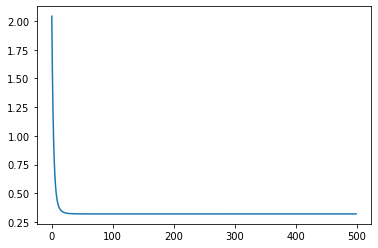

In [13]:
plt.plot(np.arange(iterations), lo)
plt.show()